In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.model_selection import train_test_split
import itertools
import math
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, ZeroPadding2D
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.applications.resnet50 import ResNet50
import cv2

%matplotlib inline

pd.set_option("display.max_rows", 6)

np.random.seed(2)

/home/daniele/miniconda3/lib/python3.6/site-packages/PIL/Image.py:116: RuntimeWarning: The _imaging extension was built for another version of Pillow or PIL:
Core version: 5.3.0.post0
Pillow version: 5.4.1
  warnings.warn(str(v), RuntimeWarning)
/home/daniele/miniconda3/lib/python3.6/site-packages/PIL/Image.py:116: RuntimeWarning: The _imaging extension was built for another version of Pillow or PIL:
Core version: 5.3.0.post0
Pillow version: 5.4.1
  warnings.warn(str(v), RuntimeWarning)
Using TensorFlow backend.
/home/daniele/miniconda3/lib/python3.6/site-packages/PIL/Image.py:116: RuntimeWarning: The _imaging extension was built for another version of Pillow or PIL:
Core version: 5.3.0.post0
Pillow version: 5.4.1
  warnings.warn(str(v), RuntimeWarning)
/home/daniele/miniconda3/lib/python3.6/site-packages/PIL/Image.py:116: RuntimeWarning: The _imaging extension was built for another version of Pillow or PIL:
Core version: 5.3.0.post0
Pillow version: 5.4.1
  warnings.warn(str(v), Runtim

In [2]:
# Load the data
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

train_X = train.iloc[:,1:]
train_y = train['label']

print(train_X.shape)
print(train_y.shape)
print(test.shape)

del train 

(42000, 784)
(42000,)
(28000, 784)


1    4684
7    4401
3    4351
     ... 
4    4072
8    4063
5    3795
Name: label, Length: 10, dtype: int64

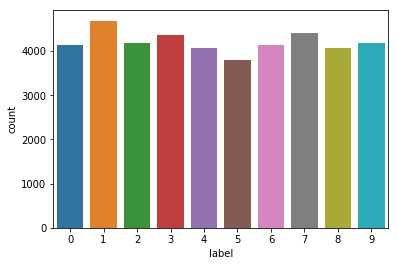

In [3]:
g = sns.countplot(train_y)
train_y.value_counts()

In [4]:
train_X.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [5]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [6]:
# Normalize the data
train_X = train_X / 255.0
test = test / 255.0

In [7]:
train_X_new = []
#for i in range(len(train_X.values)):
for i in range(2000):
    if i % 1000 == 0: print(i)
    for j in range(len(train_X.values[i])):
        train_X_new.append([train_X.values[i][j], 255 , 255])
train_X_new = np.array(train_X_new)

0
1000


In [8]:
print(train_X.shape)
train_X_new.shape

(42000, 784)


(1568000, 3)

In [9]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
train_X = train_X_new.reshape(-1,28,28,3)
test = test.values.reshape(-1,28,28,1)

In [10]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
train_y = to_categorical(train_y, num_classes = 10)

In [11]:
# Split the train and the validation set for the fitting
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size = 0.2)

ValueError: Found input variables with inconsistent numbers of samples: [2000, 42000]

In [12]:
print(train_X.shape)
print(val_X.shape)
print(train_y.shape)
print(val_y.shape)
print(test.shape)

(2000, 28, 28, 3)


NameError: name 'val_X' is not defined

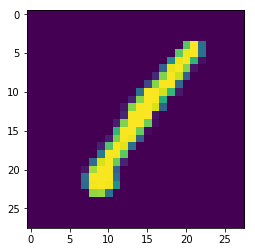

In [13]:
g = plt.imshow(train_X[0][:,:,0])

In [14]:
model = Sequential()
model.add(ZeroPadding2D(padding=(192-56, 192-56)))
model.add(ResNet50(include_top=False, weights='imagenet', input_tensor=None, input_shape=(224,224,3), pooling=None, classes=10))


/home/daniele/miniconda3/lib/python3.6/site-packages/keras_applications/resnet50.py:263: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [15]:
train_X.shape

(2000, 28, 28, 3)

In [16]:
p = model.predict(train_X)

KeyboardInterrupt: 